<a href="https://colab.research.google.com/github/2003Yash/Tranfer-Learning-with-Mobilenet-V2/blob/main/Tranfer_Learning_with_Mobilenet_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.13.0 tensorflow-hub==0.13.0

In [ ]:
#import libraries
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# We are using Mobilenet V2 model from tensorflow hub of pretrained models.

# Mobilenet V2 = { trained by google - image classification, on 1.4 million images, on 1000 classes }

In [ ]:
IMAGE_SHAPE = (224, 224)

#import model from tensorflow hub
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,)) #image shape + 3 to add 3 channels of original 224 x 224 for colours
])

Make predictions using ready made model (without any training)

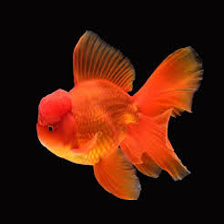

In [2]:
gold_fish = Image.open("goldfish.jpeg").resize(IMAGE_SHAPE)
gold_fish

In [3]:
gold_fish = np.array(gold_fish)/255.0 # normalize the values from 0 to 255 => 0 to 1
gold_fish.shape

(224, 224, 3)

In [8]:
gold_fish[np.newaxis, ...].shape # added 1 more dimension in beginning to make predictor understand now many images are there since predictor usually predicts a batch

(1, 224, 224, 3)

In [9]:
gold_fish[np.newaxis, ...]

array([[[[0.02352941, 0.01568627, 0.01960784],
         [0.02352941, 0.01568627, 0.01960784],
         [0.02352941, 0.01568627, 0.01960784],
         ...,
         [0.02352941, 0.01568627, 0.01960784],
         [0.02352941, 0.01568627, 0.01960784],
         [0.02352941, 0.01568627, 0.01960784]],

        [[0.02352941, 0.01568627, 0.01960784],
         [0.02352941, 0.01568627, 0.01960784],
         [0.02352941, 0.01568627, 0.01960784],
         ...,
         [0.02352941, 0.01568627, 0.01960784],
         [0.02352941, 0.01568627, 0.01960784],
         [0.02352941, 0.01568627, 0.01960784]],

        [[0.02352941, 0.01568627, 0.01960784],
         [0.02352941, 0.01568627, 0.01960784],
         [0.02352941, 0.01568627, 0.01960784],
         ...,
         [0.02352941, 0.01568627, 0.01960784],
         [0.02352941, 0.01568627, 0.01960784],
         [0.02352941, 0.01568627, 0.01960784]],

        ...,

        [[0.02352941, 0.01568627, 0.01960784],
         [0.02352941, 0.01568627, 0.01960784]

In [6]:
classifier.predict(gold_fish[np.newaxis, ...])

1/1 [==============================] - 0s 58ms/step


array([[ 0.34114978,  2.1411335 ,  8.785393  , ..., -0.9130007 ,
         1.1614126 , -0.99046814]], dtype=float32)

In [5]:
result = classifier.predict(gold_fish[np.newaxis, ...]) # using pre-trained model to predict image
result.shape # since model predicts out of 1000 classes and it gives 1000 softmax outputs and 1 extra output if image is not of those thousand classes

1/1 [==============================] - 1s 621ms/step


(1, 1001)

In [10]:
predicted_label_index = np.argmax(result) # return index of max values
predicted_label_index # 2 means 3rd class and since 0,1,2 and 3 rd class is goldfish

2

Get Class Label names as txt file

In [11]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt') # gets classes names

10484/10484 [==============================] - 0s 0us/step


'/root/.keras/datasets/ImageNetLabels.txt'

Store labels in a list to classify the class

In [13]:
image_labels = []
with open("/root/.keras/datasets/ImageNetLabels.txt", "r") as f: # "r" means read function
    image_labels = f.read().splitlines()  # splits each line of tet file into a row in image labels
image_labels[:5] # top 5 labels in image labels

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

Now analyse our prediction

In [14]:
image_labels[predicted_label_index] # our prediction

'goldfish'

Load flowers dataset

In [15]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 6s 0us/step


In [16]:
data_dir

'./datasets/flower_photos'

In [17]:
import pathlib # converts normal string path to posix path -> posix path = A path is represented by a number of path components separated by a path separator which is a / on POSIX systems and can be a / or \ on Windows
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [18]:
list(data_dir.glob('*/*.jpg'))[:5] # we converted path in before so we can use that path to do functions like this
# this code recurively goes to all paths and get their path so we can use them later 2nd cell

[PosixPath('datasets/flower_photos/dandelion/578938011_34918b1468.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4606893762_c2f26c7e91_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8083321316_f62ea76f72_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2326334426_2dc74fceb1.jpg'),
 PosixPath('datasets/flower_photos/dandelion/16987075_9a690a2183.jpg')]

In [19]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [20]:
roses = list(data_dir.glob('roses/*')) # get all rose images paths and print top 5
roses[:5]

[PosixPath('datasets/flower_photos/roses/3465443774_6b0c75a3b1_n.jpg'),
 PosixPath('datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg'),
 PosixPath('datasets/flower_photos/roses/6241886381_cc722785af.jpg'),
 PosixPath('datasets/flower_photos/roses/2215318403_06eb99176a.jpg')]

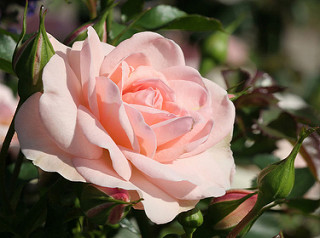

In [22]:
Image.open(str(roses[1]))

In [23]:
tulips = list(data_dir.glob('tulips/*'))

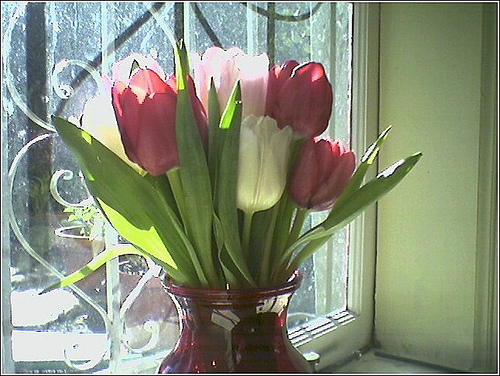

In [24]:
Image.open(str(tulips[0]))

Read flowers images from disk into numpy array

In [26]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
# creates a dict of file path of each flower ex: flowers_images_dict['dandelion'] will return all dandelion image file path

In [28]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}
# labels to classify

In [29]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3465443774_6b0c75a3b1_n.jpg'),
 PosixPath('datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg'),
 PosixPath('datasets/flower_photos/roses/6241886381_cc722785af.jpg'),
 PosixPath('datasets/flower_photos/roses/2215318403_06eb99176a.jpg')]

In [30]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/3465443774_6b0c75a3b1_n.jpg'

Using open CV to read and work with images

In [31]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [32]:
img.shape

(240, 320, 3)

In [33]:
cv2.resize(img,(224,224)).shape # wraps images into required shape

(224, 224, 3)

In [34]:
X, y = [], []

for flower_name, images in flowers_images_dict.items(): # to go each row in flower_image_dict
    for image in images: # go through each image of row
        img = cv2.imread(str(image)) # read image
        resized_img = cv2.resize(img,(224,224)) # resize image
        X.append(resized_img) # put image in X
        y.append(flowers_labels_dict[flower_name]) # put corresponding image label in y

array([[[ 15,  15,  25],
        [ 11,  17,  23],
        [ 13,  16,  13],
        ...,
        [ 18,  25,  28],
        [ 14,  22,  19],
        [ 11,  23,  21]],

       [[  5,  12,  19],
        [ 14,  21,  25],
        [ 14,  18,  19],
        ...,
        [ 15,  24,  23],
        [ 15,  24,  17],
        [ 12,  26,  21]],

       [[  4,  14,  18],
        [ 12,  17,  19],
        [ 14,  18,  25],
        ...,
        [ 12,  22,  17],
        [ 14,  25,  15],
        [ 11,  27,  18]],

       ...,

       [[ 16,  23,  31],
        [  7,  19,  23],
        [  6,  15,  23],
        ...,
        [ 87, 114, 131],
        [ 88, 120, 136],
        [ 87, 114, 130]],

       [[ 17,  22,  29],
        [  9,  21,  23],
        [  9,  17,  22],
        ...,
        [ 91, 122, 142],
        [ 85, 118, 136],
        [ 89, 118, 135]],

       [[ 18,  22,  29],
        [ 11,  23,  23],
        [ 11,  20,  23],
        ...,
        [ 90, 123, 146],
        [ 78, 113, 132],
        [ 83, 114, 133]]], dtype=uint8)
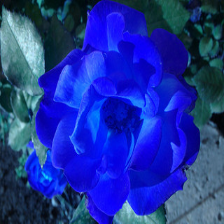

In [35]:
X[0]

In [36]:
y[0]

0

In [37]:
X = np.array(X) # putting them in np.array so we can easily work with their data to normaliza etc..,
y = np.array(y)

Train test split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Preprocessing: scale images

In [40]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

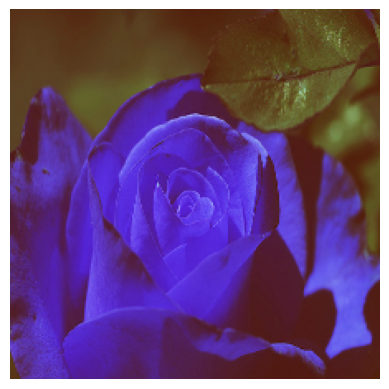

In [41]:
plt.axis('off')
plt.imshow(X[2])

Make prediction using pre-trained model on new flowers dataset

In [44]:
classifier.predict(np.array([X_train_scaled[0], X_train_scaled[1], X_train_scaled[2]]))

1/1 [==============================] - 0s 449ms/step


array([[ 0.4077498 , -0.25814837,  1.1282758 , ...,  1.2700043 ,
         3.3864439 ,  1.8251846 ],
       [ 0.30562243, -1.1925777 , -0.0930052 , ..., -0.8155063 ,
        -0.28367656,  0.73221964],
       [ 0.12544024, -0.6192353 , -0.203169  , ..., -1.0192026 ,
         0.29194045,  1.9629631 ]], dtype=float32)

In [46]:
predicted = classifier.predict(np.array([X_train_scaled[0], X_train_scaled[1], X_train_scaled[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 114ms/step


array([553, 321, 986])

In [50]:
#therefore first image is 553 class, 2nd image is 321 and third is 986 class
print(image_labels[553]+",", image_labels[321]+",", image_labels[986])

feather boa, damselfly, daisy


Maybe the 3rd image is classified correctly lets's check

In [52]:
# print(flowers_labels_dict[y_train[2]]) -> this is not working since instead of calling key of dict i'm calling value

# Instead of using y_train[2] as a key,
# we need to find the key in flowers_labels_dict that corresponds to the value y_train[2].
# We can do this using a list comprehension and the items() method of the dictionary.

label = [k for k, v in flowers_labels_dict.items() if v == y_train[2]][0]
print(label)

daisy


Fine-tune the last layers of pre-trained model using flowers images

In [55]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# before we call classifier "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
# in last we changed classification to feature vector ie., in feature vector we won't get last layer of model

In [54]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False) # since trainable is false so we freeze the weights of feature_extractor

In [56]:
num_of_flowers = 5 # no of classes to classify

model = tf.keras.Sequential([
  pretrained_model_without_top_layer, # putting pre-trained in beginning
  tf.keras.layers.Dense(num_of_flowers) # adding one extra layer of 5 nodes to classify, we should add 6 if none 5 matches but train and test dataset has only 5 labels to work so we used 5
])


In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [58]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc']
  )

In [ ]:
# in next steps colab session may crash due to insufficient ram

In [ ]:
model.fit(X_train_scaled, y_train, epochs=5) # five epochs is more than enough since we are only training 1 layer

In [ ]:
model.evaluate(X_test_scaled,y_test)